In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#### 3. 서울시 대규모점포 (쇼핑몰, 마트, 상점) 데이터 추가

In [2]:
df_big = pd.read_csv('서울시 대규모점포 인허가 정보.csv', encoding='utf-8')
df_big.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),점포구분명
0,3170000,2013317014207500002,2013-09-06,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 금천구 디지털로 185 (가산동),153-801,마리오아울렛 1관,2023-02-28 20:56:47,U,2022-12-03 00:03:00.0,쇼핑센터,189943.234285,441784.247519,NaN
1,3170000,2012317014207500004,2012-09-13,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 금천구 벚꽃로 266 (가산동),NaN,마리오아울렛 3관,2023-02-28 21:05:56,U,2022-12-03 00:03:00.0,쇼핑센터,189759.713051,441814.115921,NaN
2,3140000,2012314011407500001,2012-04-05,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,"서울특별시 양천구 목동서로 100, 105호 (목동,목동3단지아파트 관리동상가)",NaN,롯데슈퍼 목동2점,2023-03-09 09:25:54,U,2022-12-02 23:01:00.0,구분없음,188700.851170,448020.090999,NaN
3,3180000,2001318007607500029,1999-05-31,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 영등포구 영등포로 109 (당산동2가),150-723,영등포유통상가,2023-03-09 15:28:54,U,2022-12-02 23:01:00.0,그 밖의 대규모점포,190555.768992,446698.814323,NaN
4,3210000,2012321012207500002,2012-04-24,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 방배로33길 29,137-832,롯데슈퍼 방배2점,2023-03-13 17:40:32,U,2022-12-02 23:05:00.0,대형마트,198984.364832,443229.835879,NaN


In [3]:
# '구' 정보 추출
pattern = r'(\S+구)'
df_big['구'] = df_big['지번주소'].str.extract(pattern, expand=False).dropna()

# 각 '구'의 개수 카운트
count_by_gu = df_big['구'].value_counts()

# 결과 출력
print(count_by_gu)

## 서울시 구 아닌거 날리기

강남구     55
성북구     55
강동구     53
구로구     53
영등포구    52
동대문구    52
송파구     50
강서구     44
은평구     42
중구      36
양천구     35
광진구     34
마포구     31
금천구     31
성동구     30
관악구     28
용산구     28
노원구     28
강북구     25
종로구     24
동작구     23
서대문구    20
도봉구     18
중랑구     17
서초구     15
Name: 구, dtype: int64


In [4]:
# '상세영업상태명' 열의 값들 추출
unique_status_names = df_big['상세영업상태명'].unique()

# 결과 출력
print(unique_status_names)

['정상영업' '영업개시전' '폐업처리' '직권취소' '휴업처리' nan]


In [5]:
# '상세영업상태명'이 '정상영업'인 경우에만 '구' 정보 추출
pattern = r'(\S+구)'
df_big['구'] = df_big[df_big['상세영업상태명'] == '정상영업']['지번주소'].str.extract(pattern, expand=False).dropna()

# 각 '구'의 개수 카운트
count_by_gu = df_big['구'].value_counts()

# 결과 출력
print(count_by_gu)

영등포구    41
송파구     39
성북구     38
구로구     37
강남구     36
동대문구    32
중구      31
강서구     26
광진구     26
은평구     25
용산구     24
마포구     24
양천구     23
관악구     22
노원구     20
강동구     20
성동구     19
종로구     19
금천구     19
강북구     19
서대문구    19
도봉구     15
중랑구     14
동작구     14
서초구     11
Name: 구, dtype: int64


C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29256\3917211590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='개수', y='구', data=df_count_by_gu, palette='viridis')


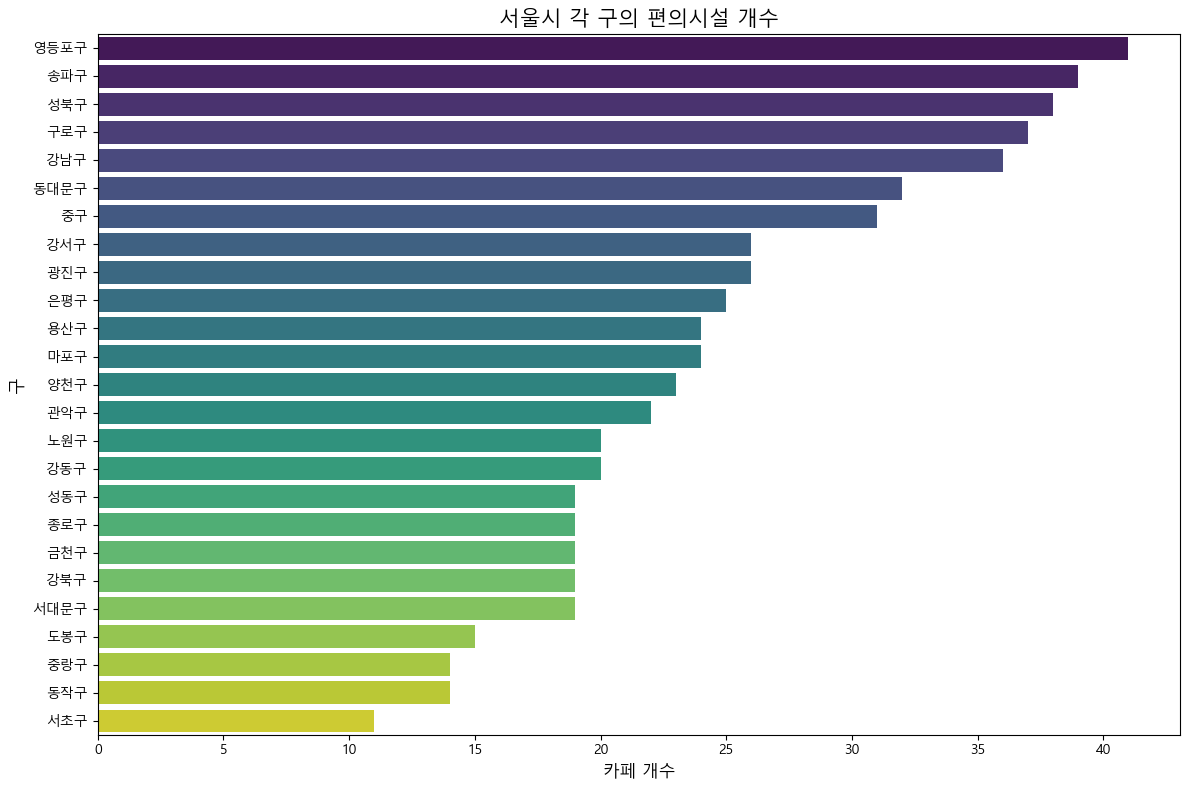

In [6]:
# 한글
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# df 생성
df_count_by_gu = pd.DataFrame(list(count_by_gu.items()), columns=['구', '개수'])

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='개수', y='구', data=df_count_by_gu, palette='viridis')
plt.title('서울시 각 구의 편의시설 개수', fontsize=15)
plt.xlabel('카페 개수', fontsize=12)
plt.ylabel('구', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
# 정규화 - 채택
normalized_values = {
    '영등포구': 41,
    '송파구': 39,
    '성북구': 38,
    '구로구': 37,
    '강남구': 36,
    '동대문구': 32,
    '중구': 31,
    '강서구': 26,
    '광진구': 26,
    '은평구': 25,
    '용산구': 24,
    '마포구': 24,
    '양천구': 23,
    '관악구': 22,
    '노원구': 20,
    '강동구': 20,
    '성동구': 19,
    '종로구': 19,
    '금천구': 19,
    '강북구': 19,
    '서대문구': 19,
    '도봉구': 15,
    '중랑구': 14,
    '동작구': 14,
    '서초구': 11
}

# 최소값과 최대값 계산
min_value = min(normalized_values.values())
max_value = max(normalized_values.values())

# 정규화된 결과를 저장할 딕셔너리 초기화
normalized_results = {}

# 각 구의 정규화된 값을 계산하여 저장
for gu, value in normalized_values.items():
    normalized_value = (value - min_value) / (max_value - min_value)
    normalized_results[gu] = round(normalized_value, 4)  # 소수점 4자리까지 반올림하여 저장

# 결과 출력
for gu, value in normalized_results.items():
    print(f'{gu}: {value:.4f}')

# 혹은 정규화된 결과를 딕셔너리로 바로 출력
print(normalized_results)

영등포구: 1.0000
송파구: 0.9333
성북구: 0.9000
구로구: 0.8667
강남구: 0.8333
동대문구: 0.7000
중구: 0.6667
강서구: 0.5000
광진구: 0.5000
은평구: 0.4667
용산구: 0.4333
마포구: 0.4333
양천구: 0.4000
관악구: 0.3667
노원구: 0.3000
강동구: 0.3000
성동구: 0.2667
종로구: 0.2667
금천구: 0.2667
강북구: 0.2667
서대문구: 0.2667
도봉구: 0.1333
중랑구: 0.1000
동작구: 0.1000
서초구: 0.0000
{'영등포구': 1.0, '송파구': 0.9333, '성북구': 0.9, '구로구': 0.8667, '강남구': 0.8333, '동대문구': 0.7, '중구': 0.6667, '강서구': 0.5, '광진구': 0.5, '은평구': 0.4667, '용산구': 0.4333, '마포구': 0.4333, '양천구': 0.4, '관악구': 0.3667, '노원구': 0.3, '강동구': 0.3, '성동구': 0.2667, '종로구': 0.2667, '금천구': 0.2667, '강북구': 0.2667, '서대문구': 0.2667, '도봉구': 0.1333, '중랑구': 0.1, '동작구': 0.1, '서초구': 0.0}


In [8]:
df_merge2 = pd.read_csv('merge_2.csv') 

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29256\2777636780.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merge2 = pd.read_csv('merge_2.csv')


In [9]:
# '구' 정보 추출하여 상수 값 매핑
df_merge2['구'] = df_merge2['시군구'].str.extract(r'(\S+구)', expand=False)

# 각 '구'에 해당하는 상수 값 추가
df_merge2['대규모점포'] = df_merge2['구'].map(normalized_results)

# '구' 컬럼 삭제
df_merge2 = df_merge2.drop(columns=['구'])

# CSV 파일로 저장
df_merge2.to_csv('merge_3.csv', index=False)

In [13]:
df_output = pd.read_csv('merge_3.csv') 
df_output.head()

C:\Users\LEE AYOON\AppData\Local\Temp\ipykernel_29256\386011133.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv('merge_3.csv')


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,휴게음식점,일반음식점,대규모점포
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000,1.0,1.0,0.8333
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500,1.0,1.0,0.8333
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500,1.0,1.0,0.8333
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000,1.0,1.0,0.8333
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000,1.0,1.0,0.8333


In [11]:
# '대규모점포' 열의 null 값 개수 세기
null_count_general = df_output['대규모점포'].isnull().sum()
print(f'대규모점포 열의 null 값 개수: {null_count_general}')

# '시군구' 열의 null 값 개수 세기
null_count_sigungu = df_output['시군구'].isnull().sum()
print(f'시군구 열의 null 값 개수: {null_count_sigungu}')

대규모점포 열의 null 값 개수: 0
시군구 열의 null 값 개수: 0
